<a href="https://colab.research.google.com/github/TIANBOQIU/AppliedDeepLearning/blob/master/hw1_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

# Data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
## prepocessing
train_images = train_images / 255.0
test_images = test_images / 255.0
## validation set for training, size 10000
val_images = train_images[:10000]
val_labels = train_labels[:10000]
partial_train_images = train_images[10000:]
partial_train_labels = train_labels[10000:]

# Model - Linear
def build_model_linear():
  model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)),
      layers.Dense(10, activation=tf.nn.softmax)
  ])
  model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  return model


def plot_loss(history):
  history_dict = history.history
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']
  epochs = range(1, len(loss)+1)
  plt.plot(epochs, loss, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_acc(history):
  history_dict = history.history
  acc = history_dict['acc']
  val_acc = history_dict['val_acc']
  
  epochs = range(1, len(acc)+1)
  
  plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()



4423680/4422102 [==============================] - 0s 0us/step


In [20]:
#model = build_model_1hidden()
model = build_model_linear()
history = model.fit(partial_train_images, partial_train_labels, epochs=10,validation_data=(val_images, val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 130us/sample - loss: 0.6274 - acc: 0.7888 - val_loss: 0.4999 - val_acc: 0.8349
Epoch 2/10
50000/50000 [==============================] - 6s 123us/sample - loss: 0.4718 - acc: 0.8394 - val_loss: 0.4540 - val_acc: 0.8482
Epoch 3/10
50000/50000 [==============================] - 6s 121us/sample - loss: 0.4431 - acc: 0.8472 - val_loss: 0.4421 - val_acc: 0.8489
Epoch 4/10
50000/50000 [==============================] - 6s 122us/sample - loss: 0.4277 - acc: 0.8531 - val_loss: 0.4468 - val_acc: 0.8422
Epoch 5/10
50000/50000 [==============================] - 6s 122us/sample - loss: 0.4164 - acc: 0.8552 - val_loss: 0.4254 - val_acc: 0.8547
Epoch 6/10
50000/50000 [==============================] - 6s 121us/sample - loss: 0.4105 - acc: 0.8581 - val_loss: 0.4213 - val_acc: 0.8537
Epoch 7/10
50000/50000 [==============================] - 6s 120us/sample - loss: 0.4049 - acc: 0.8599 - val_l

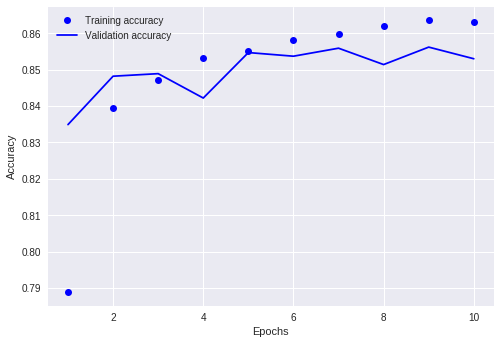

In [21]:
# Part 1.1
plot_acc(history)

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.4509 - acc: 0.8417
Test accuracy: 0.8417


In [18]:
# Part1.2
def build_model():
  model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)),
      layers.Dense(128, activation=tf.nn.relu),
      layers.Dropout(0.2),
      layers.Dense(64, activation=tf.nn.relu),
      layers.Dense(10, activation=tf.nn.softmax)
  ])
  model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

model2 = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 5 == 0: print("")
    print('*',end='')
history2 = model2.fit(partial_train_images, partial_train_labels, batch_size = 512, epochs=50,validation_data=(val_images, val_labels))
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 25us/sample - loss: 0.8429 - acc: 0.7091 - val_loss: 0.5249 - val_acc: 0.8189
Epoch 2/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.5009 - acc: 0.8256 - val_loss: 0.4281 - val_acc: 0.8533
Epoch 3/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.4353 - acc: 0.8464 - val_loss: 0.3979 - val_acc: 0.8577
Epoch 4/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.4002 - acc: 0.8574 - val_loss: 0.3744 - val_acc: 0.8647
Epoch 5/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.3772 - acc: 0.8655 - val_loss: 0.3629 - val_acc: 0.8708
Epoch 6/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.3603 - acc: 0.8708 - val_loss: 0.3443 - val_acc: 0.8758
Epoch 7/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.3495 - acc: 0.8739 - val_loss: 0.

In [25]:
!pip install -q pydot, graphviz, mpimg

Invalid requirement: 'pydot,'



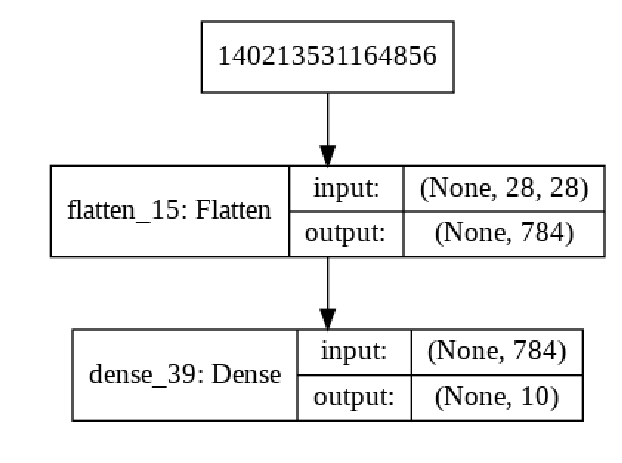

In [26]:
# Part 1.3
import matplotlib.image as mpimg
from tensorflow.keras.utils import plot_model
# linear model
image_path = 'model.png'
plot_model(model, show_shapes=True, to_file=image_path)

plt.figure(dpi=100)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.show()


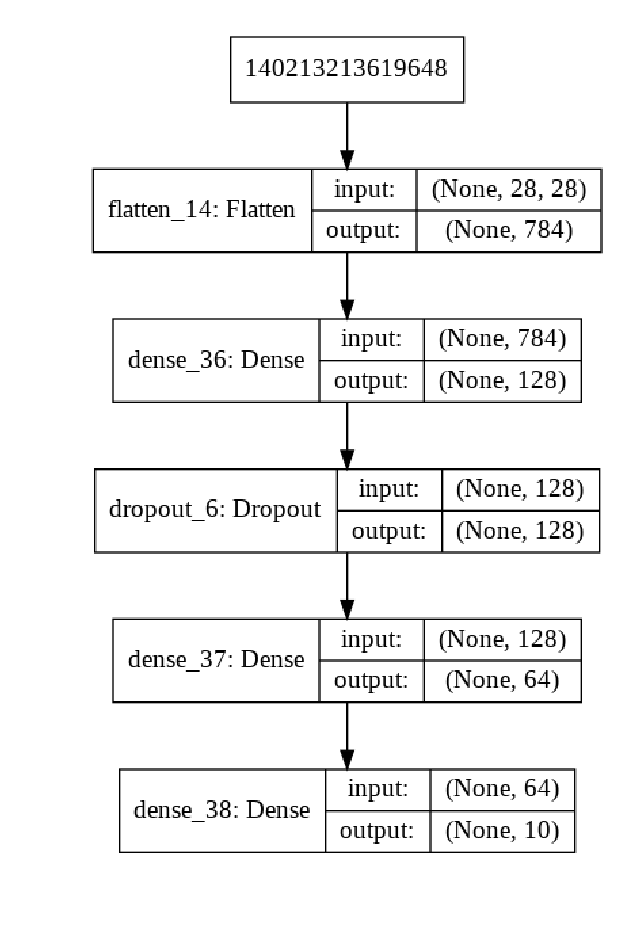

In [28]:
# deep model
image_path2 = 'model_deep.png'
plot_model(model2, show_shapes=True, to_file = image_path2)
plt.figure(dpi=200)
implot = plt.imshow(mpimg.imread(image_path2))
plt.axis('off')
plt.show()

In [0]:
# Part 1.4 Confusion Matrix